In [1]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 3.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 6.2 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.4 MB 8.0 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00


In [2]:
import pandas as pd 
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
book=pd.read_csv("book.csv")

In [6]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [12]:
book.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [13]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [15]:
book1=book.iloc[:,5:]
book1

,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
1995,1,1,1,0,1,1
1996,0,0,0,0,0,0
1997,0,0,0,0,0,0
1998,0,0,0,0,0,0


# Apriori Algorithm

In [19]:
freq_item=apriori(book,min_support=0.1,use_colnames=True)
freq_item

C:\Users\100ra\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [21]:
rules=association_rules(freq_item,metric="lift",min_threshold=0.7)
rules
rules.sort_values("lift",ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
78,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
79,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,0.682834
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
99,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,0.726961
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,0.683298


In [22]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


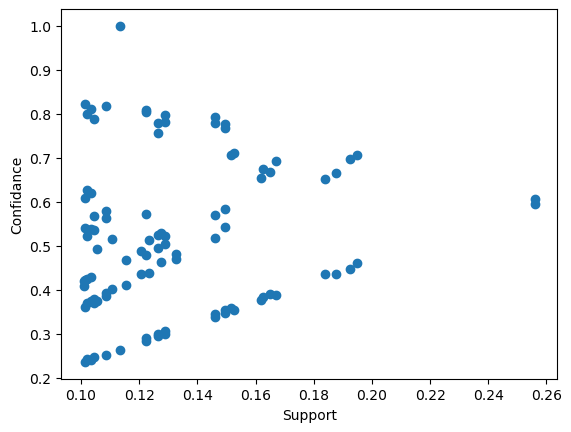

In [23]:
import matplotlib.pyplot as plt
plt.scatter(rules["support"],rules["confidence"])
plt.xlabel("Support")
plt.ylabel("Confidance")
plt.show()

In [24]:
freq_item1=apriori(book,min_support=0.20,use_colnames=True)
freq_item1

C:\Users\100ra\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [25]:
rules1=association_rules(freq_item1,metric="lift",min_threshold=0.6)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


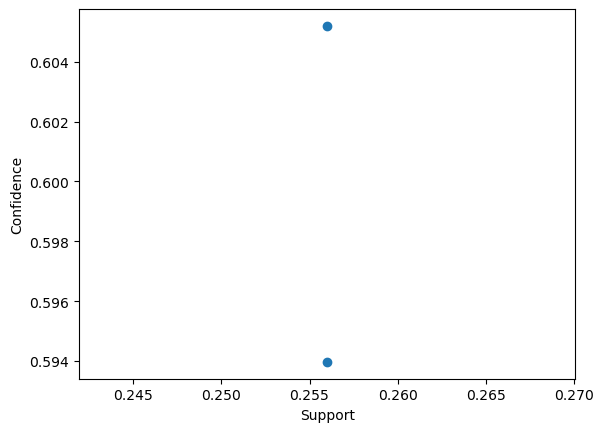

In [27]:
plt.scatter(rules1["support"],rules1["confidence"])
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [31]:
freq_item2=apriori(book,min_support=0.05,use_colnames=True)
freq_item2

C:\Users\100ra\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, CookBks, GeogBks)"
96,0.0560,"(GeogBks, YouthBks, CookBks, ArtBks)"
97,0.0650,"(DoItYBks, GeogBks, CookBks, ArtBks)"
98,0.0510,"(CookBks, DoItYBks, GeogBks, YouthBks, ChildBks)"


In [33]:
rules2=association_rules(freq_item2,metric="lift",min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(DoItYBks, GeogBks, ArtBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
658,(ArtBks),"(DoItYBks, CookBks, GeogBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
659,(DoItYBks),"(GeogBks, CookBks, ArtBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
660,(GeogBks),"(DoItYBks, CookBks, ArtBks, ChildBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923


In [34]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
657,(CookBks),"(DoItYBks, GeogBks, ArtBks, ChildBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789,0.915050
658,(ArtBks),"(DoItYBks, CookBks, GeogBks, ChildBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939,0.789307
659,(DoItYBks),"(GeogBks, CookBks, ArtBks, ChildBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085,0.779762
660,(GeogBks),"(DoItYBks, CookBks, ArtBks, ChildBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733,0.796923


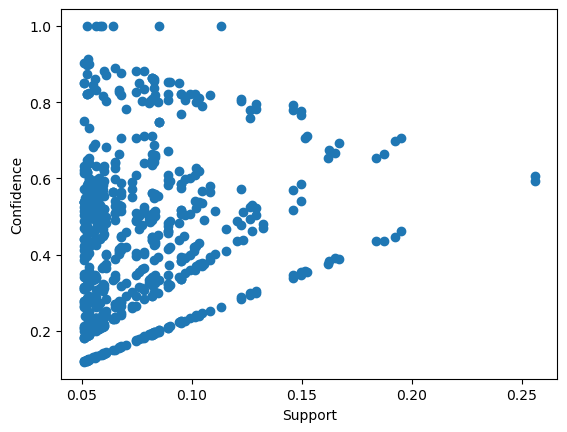

In [35]:
plt.scatter(rules2["support"],rules2["confidence"])
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

In [ ]:
-----------------------------------------------END------------------------------